In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import numpy as np
# Leer el archivo CSV
df = pd.read_csv('NAnderson2020MendeleyMangoNIRData.csv')
df.head()

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,285,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['Set'].unique()

array(['Cal', 'Tuning', 'Val Ext'], dtype=object)

In [7]:
#----1
# Elegir un cultivar
df = df[df.iloc[:, 5].str.contains("Caly")]
df

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,285,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,15.138473,0,...,0,0,0,0,0,0,0,0,0,0
11607,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,19.372226,0,...,0,0,0,0,0,0,0,0,0,0
11608,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,19.372226,0,...,0,0,0,0,0,0,0,0,0,0
11609,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,18.791875,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#----2
# Separar las filas en dos grupos basados en la condición de la primera columna
df_cal = df[~df.iloc[:, 0].str.contains("Val Ext")]
df_test = df[df.iloc[:, 0].str.contains("Val Ext")]

In [9]:
df_test

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,285,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
10243,Val Ext,4,NT,7/08/2018,Hard Green,Caly,95,No,15.413108,0,...,0,0,0,0,0,0,0,0,0,0
10244,Val Ext,4,NT,7/08/2018,Hard Green,Caly,95,No,15.413108,0,...,0,0,0,0,0,0,0,0,0,0
10245,Val Ext,4,NT,7/08/2018,Hard Green,Caly,95,No,15.852260,0,...,0,0,0,0,0,0,0,0,0,0
10246,Val Ext,4,NT,7/08/2018,Hard Green,Caly,95,No,15.852260,0,...,0,0,0,0,0,0,0,0,0,0
10247,Val Ext,4,NT,7/08/2018,Hard Green,Caly,95,No,19.208158,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,15.138473,0,...,0,0,0,0,0,0,0,0,0,0
11607,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,19.372226,0,...,0,0,0,0,0,0,0,0,0,0
11608,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,19.372226,0,...,0,0,0,0,0,0,0,0,0,0
11609,Val Ext,4,QLD,25/01/2019,Ripen,Caly,111,No,18.791875,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#----3
# Guardar las columnas con nombre 309 al 1149 en X_cal y X_test
X_cal = df_cal.iloc[:, 17:298]
X_test = df_test.iloc[:, 17:298]
# Guardar la columna 'DM' en Y_cal y Y_test
Y_cal = df_cal['DM']
Y_test = df_test['DM']

In [11]:
X_cal

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.478784,-0.473973,-0.520787,-0.504875,-0.457819,-0.402840,-0.287658,-0.393823,-0.298228,-0.389325,...,-0.435326,-0.432677,-0.327782,-0.429858,-0.381867,-0.338903,-0.332650,-0.267678,-0.271822,-0.222478
1,-0.527173,-0.437459,-0.432212,-0.453319,-0.401421,-0.379517,-0.584032,-0.590916,-0.430159,-0.451906,...,-0.425621,-0.360318,-0.433971,-0.331219,-0.347740,-0.338237,-0.286042,-0.269070,-0.228549,-0.230635
2,-0.501680,-0.449072,-0.412682,-0.430094,-0.477864,-0.518983,-0.518602,-0.408991,-0.525265,-0.553890,...,-0.432784,-0.428193,-0.427225,-0.441603,-0.397718,-0.389544,-0.406758,-0.395734,-0.381844,-0.383979
3,-0.455363,-0.409809,-0.426535,-0.422015,-0.436697,-0.511022,-0.519885,-0.477157,-0.380288,-0.462902,...,-0.438664,-0.443749,-0.415500,-0.407620,-0.424088,-0.387267,-0.387440,-0.394388,-0.403848,-0.388985
4,-0.436971,-0.428836,-0.473545,-0.486633,-0.453210,-0.443006,-0.495762,-0.481034,-0.401428,-0.538858,...,-0.436217,-0.384951,-0.381970,-0.396246,-0.366629,-0.331301,-0.367609,-0.316976,-0.278354,-0.254439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.402222,-0.348971,-0.316996,-0.254803,-0.204488,-0.185047,-0.146959,-0.074227,-0.107625,-0.160561
10161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.351007,-0.287550,-0.269602,-0.192007,-0.108514,0.085336,0.178985,0.238851,0.257261,0.200535
10162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.401218,-0.376227,-0.367910,-0.252181,-0.222440,-0.084201,-0.058789,0.050597,0.118769,0.159340
10163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.384807,-0.380350,-0.382262,-0.274459,-0.241628,-0.193809,-0.272217,-0.230217,-0.220762,-0.265374


El mejor número de componentes_1 para PCR es: 19
El mejor número de componentes_2 para PCR es: 250
El mejor número de componentes_2 para PLSR es: 29
El mejor número de componentes_2 para PLSR es: 100


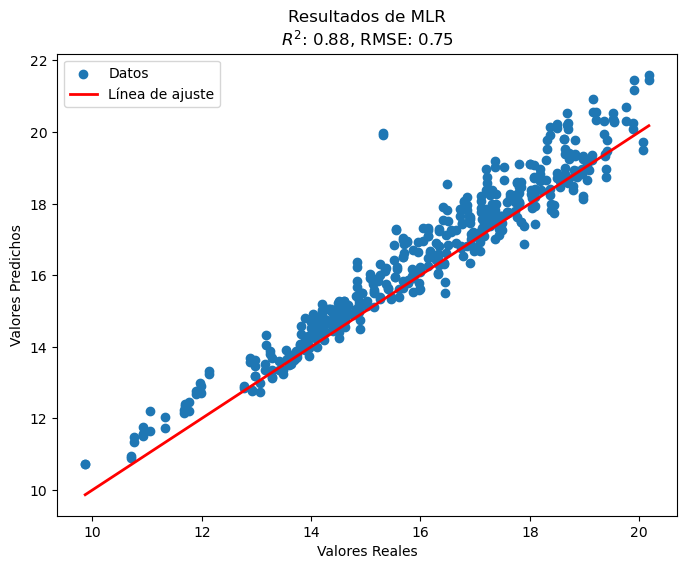

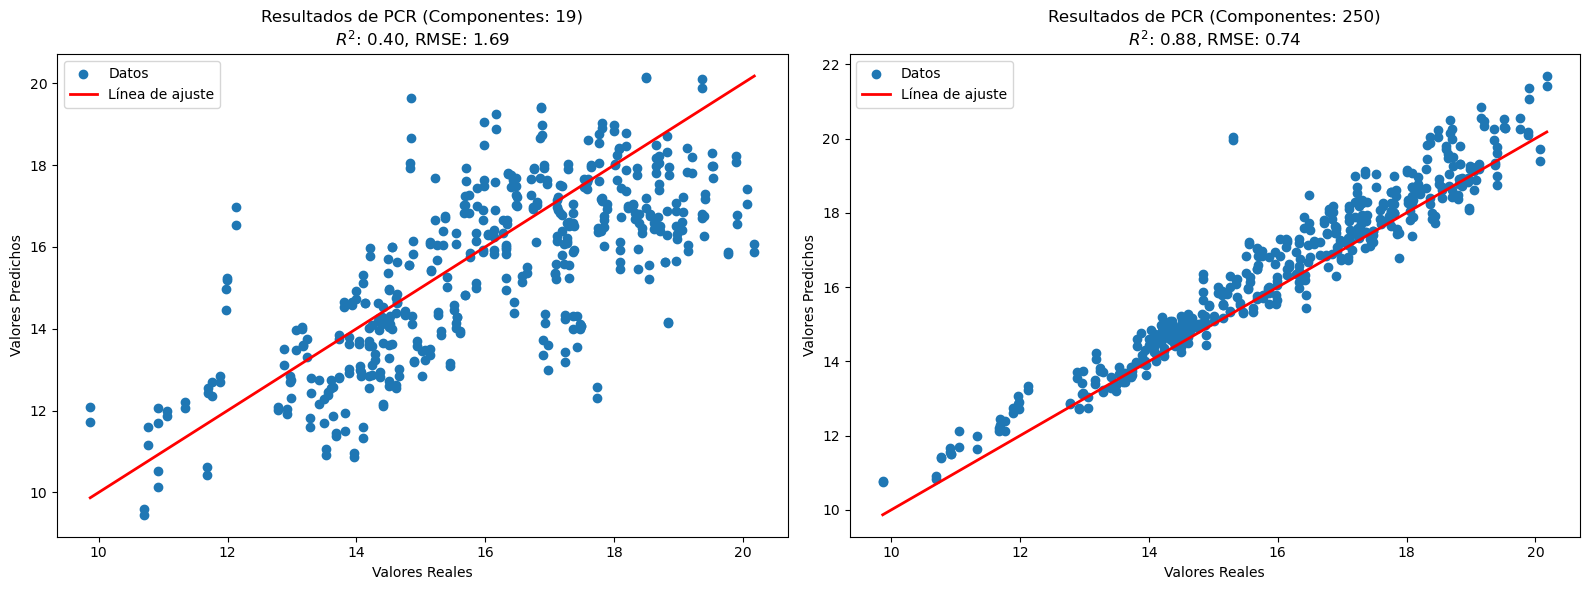

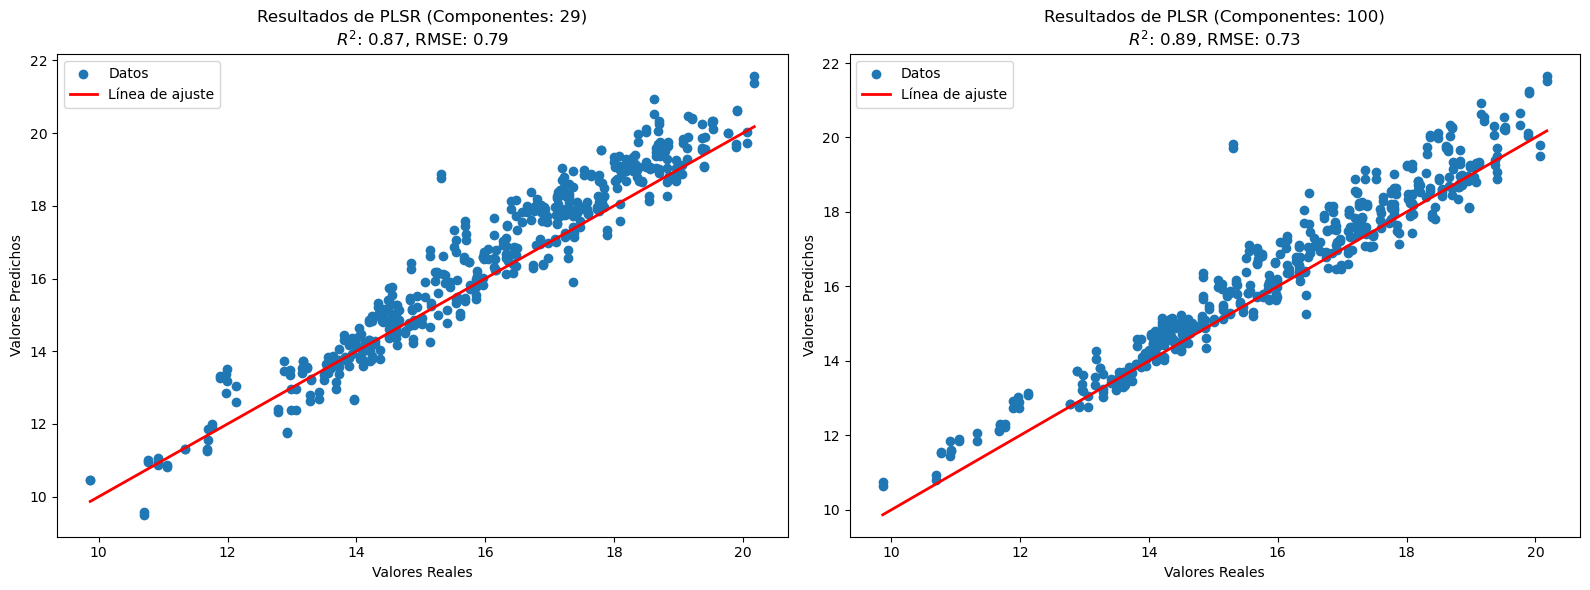

In [13]:
#----4
# Preparar el pipeline para MLR
mlr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
# Preparar el pipeline para PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
])
# Preparar el pipeline para PLSR
pls_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pls', PLSRegression())
])

#----5
# Definir la búsqueda por cuadrícula para PCR
pca_param_grid_1 = {
    'pca__n_components': np.arange(1,30)
}
pca_param_grid_2 = {
    'pca__n_components': [32,64,100,150,200,250,280]
}
# Definir la búsqueda por cuadrícula para PLSR
pls_param_grid_1 = {
    'pls__n_components': np.arange(1,30)
}
pls_param_grid_2 = {
    'pls__n_components': [32,64,100,150,200,250,280]
}

#----6
# Configurar la validación cruzada con mezcla y una semilla aleatoria
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Configurar la búsqueda por cuadrícula con validación cruzada para PCR
pca_grid_search_1= GridSearchCV(pca_pipeline, pca_param_grid_1, cv=cv, scoring='neg_mean_squared_error')
pca_grid_search_1.fit(X_cal, Y_cal)
pca_grid_search_2= GridSearchCV(pca_pipeline, pca_param_grid_2, cv=cv, scoring='neg_mean_squared_error')
pca_grid_search_2.fit(X_cal, Y_cal)

# Obtener el mejor número de componentes para PCR
best_pca_n_components_1 = pca_grid_search_1.best_params_['pca__n_components']
print(f"El mejor número de componentes_1 para PCR es: {best_pca_n_components_1}")
best_pca_n_components_2 = pca_grid_search_2.best_params_['pca__n_components']
print(f"El mejor número de componentes_2 para PCR es: {best_pca_n_components_2}")

# Configurar la búsqueda por cuadrícula con validación cruzada para PLSR
pls_grid_search_1= GridSearchCV(pls_pipeline, pls_param_grid_1, cv=cv, scoring='neg_mean_squared_error')
pls_grid_search_1.fit(X_cal, Y_cal)
pls_grid_search_2 = GridSearchCV(pls_pipeline, pls_param_grid_2, cv=cv, scoring='neg_mean_squared_error')
pls_grid_search_2.fit(X_cal, Y_cal)

# Obtener el mejor número de componentes para PLSR
best_pls_n_components_1 = pls_grid_search_1.best_params_['pls__n_components']
print(f"El mejor número de componentes_2 para PLSR es: {best_pls_n_components_1}")
best_pls_n_components_2 = pls_grid_search_2.best_params_['pls__n_components']
print(f"El mejor número de componentes_2 para PLSR es: {best_pls_n_components_2}")

#----7
# Ajustar modelo de MLR
mlr_pipeline.fit(X_cal,Y_cal)

# Ajustar nuevamente los modelos de PCR con los mejores parámetros
best_pcr_pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_pca_n_components_1)),
    ('regressor', LinearRegression())
])
best_pcr_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_pca_n_components_2)),
    ('regressor', LinearRegression())
])
best_pcr_pipeline_1.fit(X_cal, Y_cal)
best_pcr_pipeline_2.fit(X_cal, Y_cal)

# Ajustar nuevamente el modelo de PLSR con los mejores parámetros
best_plsr_pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pls', PLSRegression(n_components=best_pls_n_components_1))
])
best_plsr_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pls', PLSRegression(n_components=best_pls_n_components_2))
])
best_plsr_pipeline_1.fit(X_cal, Y_cal)
best_plsr_pipeline_2.fit(X_cal, Y_cal)

#----8
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
# Hacer predicciones en el conjunto de prueba
Y_pred_mlr = mlr_pipeline.predict(X_test)
Y_pred_pcr_1 = best_pcr_pipeline_1.predict(X_test)
Y_pred_pcr_2 = best_pcr_pipeline_2.predict(X_test)
Y_pred_plsr_1 = best_plsr_pipeline_1.predict(X_test)
Y_pred_plsr_2 = best_plsr_pipeline_2.predict(X_test)

# Calcular R2 y RMSE para MLR
r2_mlr = r2_score(Y_test, Y_pred_mlr)
rmse_mlr = np.sqrt(mean_squared_error(Y_test, Y_pred_mlr))

# Calcular R2 y RMSE para PCR
r2_pcr_1 = r2_score(Y_test, Y_pred_pcr_1)
rmse_pcr_1 = np.sqrt(mean_squared_error(Y_test, Y_pred_pcr_1))
r2_pcr_2 = r2_score(Y_test, Y_pred_pcr_2)
rmse_pcr_2 = np.sqrt(mean_squared_error(Y_test, Y_pred_pcr_2))

# Calcular R2 y RMSE para PLSR
r2_plsr_1 = r2_score(Y_test, Y_pred_plsr_1)
rmse_plsr_1 = np.sqrt(mean_squared_error(Y_test, Y_pred_plsr_1))
r2_plsr_2 = r2_score(Y_test, Y_pred_plsr_2)
rmse_plsr_2 = np.sqrt(mean_squared_error(Y_test, Y_pred_plsr_2))

# Crear gráfica para MLR
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_mlr, label='Datos')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Resultados de MLR\n$R^2$: {r2_mlr:.2f}, RMSE: {rmse_mlr:.2f}')
plt.legend()
plt.show()

# Crear gráficas para PCR
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred_pcr_1, label='Datos')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Resultados de PCR (Componentes: {best_pca_n_components_1})\n$R^2$: {r2_pcr_1:.2f}, RMSE: {rmse_pcr_1:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_pcr_2, label='Datos')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Resultados de PCR (Componentes: {best_pca_n_components_2})\n$R^2$: {r2_pcr_2:.2f}, RMSE: {rmse_pcr_2:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Crear gráficas para PLSR
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred_plsr_1, label='Datos')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Resultados de PLSR (Componentes: {best_pls_n_components_1})\n$R^2$: {r2_plsr_1:.2f}, RMSE: {rmse_plsr_1:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_plsr_2, label='Datos')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Resultados de PLSR (Componentes: {best_pls_n_components_2})\n$R^2$: {r2_plsr_2:.2f}, RMSE: {rmse_plsr_2:.2f}')
plt.legend()

plt.tight_layout()
plt.show()